# Categorical Support Vector Classifier

## Imports

In [40]:
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder 
from sklearn import svm, datasets
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, \
f1_score, classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report 

## Loading the database

#### Read the csv file and study the database

In [8]:
df = pd.read_csv("./mushrooms-full-dataset.csv")

In [10]:
df.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Preprocessing

#### Define the target and the inputs

In [16]:
df.isna().sum()

poisonous                   0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [18]:
inputs = df.copy()
inputs=inputs.drop("poisonous",axis=1)

#### Create a training and a testing dataset

In [24]:
x_train , x_test , y_train , y_test = train_test_split(inputs, 
                                                       df["poisonous"]
                                                       ,test_size=0.2
                                                       , random_state=365
                                                      , stratify=df["poisonous"])

In [26]:
y_train.value_counts()

poisonous
e    3366
p    3133
Name: count, dtype: int64

#### Define a separate encoder for the target and the inputs 

In [42]:
ord = OrdinalEncoder()
x_train_t = ord.fit_transform(x_train)
x_test_t = ord.transform(x_test)

# For target variable
label_enc = LabelEncoder()
y_train_t = label_enc.fit_transform(y_train)
y_test_t = label_enc.transform(y_test)

## Rescaling

### In order for the SVC to work correctly the inputs need to be rescaled to the range (-1, 1)

In [46]:
MXM = MinMaxScaler(feature_range=(-1,1))
x_train_t_s=MXM.fit_transform(x_train_t)
x_test_t_s=MXM.transform(x_test_t)


## Classification

In [54]:
C=1.0
svc = svm.SVC(kernel="linear",C=C).fit(x_train_t_s,y_train_t)

In [65]:
y_pred=svc.predict(x_test_t_s)

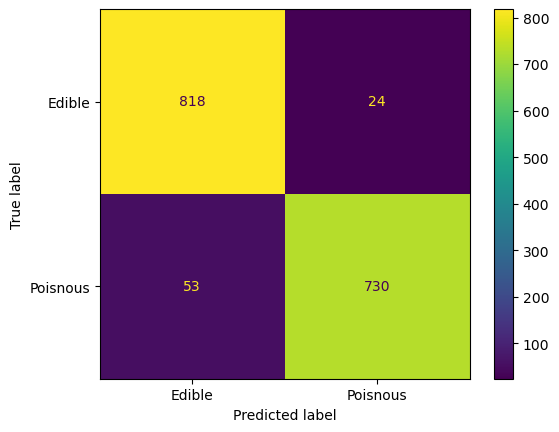

In [69]:
ConfusionMatrixDisplay.from_predictions(y_test_t ,y_pred , display_labels=["Edible","Poisnous"] )

## Evaluation

In [73]:
print(classification_report(y_test_t ,y_pred ))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       842
           1       0.97      0.93      0.95       783

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



## Hyperparameter Tuning with GridSearchCV

### Choose the best kernel and optimal C parameter based on Cross Validation of the training data